In [1]:
import matplotlib.pyplot as plt
from techical_indicators import RSI, MACD, OBV, StochasticOscillator, IndicatorWrapper
from models import Stock
from utils import DateChunker

In [2]:
STOCK = Stock('AAPL')
indicators = [
    RSI(period=14, magnitude=100),
    MACD(fast=12, slow=26, signal=9),
    OBV(),
    StochasticOscillator(fast_k=14, slow_k=3, slow_d=3)]
indicator = IndicatorWrapper(indicators, fillna=-1.0)
df = indicator(STOCK)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3354 entries, 2024-09-18 09:30:00-04:00 to 2024-11-15 15:55:00-05:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3354 non-null   float64
 1   High          3354 non-null   float64
 2   Low           3354 non-null   float64
 3   Close         3354 non-null   float64
 4   Volume        3354 non-null   int64  
 5   Dividends     3354 non-null   float64
 6   Stock Splits  3354 non-null   float64
 7   RSI           3354 non-null   float64
 8   MACD          3354 non-null   float64
 9   MACDh         3354 non-null   float64
 10  MACDs         3354 non-null   float64
 11  OBV           3354 non-null   float64
 12  STOCH_k       3354 non-null   float64
 13  STOCH_d       3354 non-null   float64
 14  STOCH_s       3354 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 548.3+ KB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3354 entries, 2024-09-18 09:30:00-04:00 to 2024-11-15 15:55:00-05:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3354 non-null   float64
 1   High          3354 non-null   float64
 2   Low           3354 non-null   float64
 3   Close         3354 non-null   float64
 4   Volume        3354 non-null   int64  
 5   Dividends     3354 non-null   float64
 6   Stock Splits  3354 non-null   float64
 7   RSI           3354 non-null   float64
 8   MACD          3354 non-null   float64
 9   MACDh         3354 non-null   float64
 10  MACDs         3354 non-null   float64
 11  OBV           3354 non-null   float64
 12  STOCH_k       3354 non-null   float64
 13  STOCH_d       3354 non-null   float64
 14  STOCH_s       3354 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 548.3+ KB


In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MACD,MACDh,MACDs,OBV,STOCH_k,STOCH_d,STOCH_s
Datetime,,,,,,,,,,,,,,,
2024-09-18 09:30:00-04:00,218.250000,219.160004,218.172195,218.509995,2867859,0.0,0.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2024-09-18 09:35:00-04:00,218.505005,219.529907,218.384995,218.990005,1488947,0.0,0.0,100.000000,-1.0,-1.0,-1.0,1488947.0,-1.0,-1.0,-1.0
2024-09-18 09:40:00-04:00,219.250000,219.440002,218.990005,219.070007,872158,0.0,0.0,100.000000,-1.0,-1.0,-1.0,2361105.0,-1.0,-1.0,-1.0
2024-09-18 09:45:00-04:00,219.059998,219.169998,218.639999,218.794296,717736,0.0,0.0,95.512820,-1.0,-1.0,-1.0,1643369.0,-1.0,-1.0,-1.0
2024-09-18 09:50:00-04:00,218.785004,219.395004,218.460007,219.199997,848006,0.0,0.0,95.810706,-1.0,-1.0,-1.0,2491375.0,-1.0,-1.0,-1.0


In [6]:
df[indicator.column_names]

,RSI,MACD,MACDh,MACDs,OBV,STOCH_k,STOCH_d,STOCH_s
Datetime,,,,,,,,
2024-09-18 09:30:00-04:00,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000
2024-09-18 09:35:00-04:00,100.000000,-1.000000,-1.000000,-1.000000,1488947.0,-1.000000,-1.000000,-1.000000
2024-09-18 09:40:00-04:00,100.000000,-1.000000,-1.000000,-1.000000,2361105.0,-1.000000,-1.000000,-1.000000
2024-09-18 09:45:00-04:00,95.512820,-1.000000,-1.000000,-1.000000,1643369.0,-1.000000,-1.000000,-1.000000
2024-09-18 09:50:00-04:00,95.810706,-1.000000,-1.000000,-1.000000,2491375.0,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...
2024-11-15 15:35:00-05:00,52.323305,0.049114,0.027530,0.021584,38081235.0,58.085440,59.515812,-1.430372
2024-11-15 15:40:00-05:00,49.752122,0.040819,0.015388,0.025431,37681769.0,55.044994,57.127017,-2.082023
2024-11-15 15:45:00-05:00,48.469417,0.029866,0.003548,0.026318,37228296.0,44.704045,52.611493,-7.907448


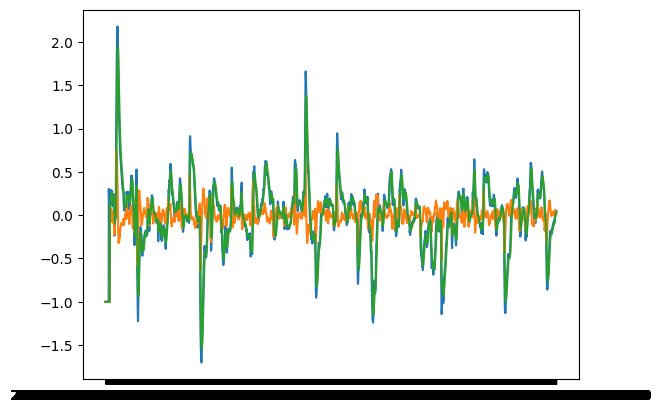

In [7]:
plt.plot(df[MACD.column_names])

In [ ]:
chunks = DateChunker(df)

In [23]:
chunks.get_date('2024-11-01').describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MACD,MACDh,MACDs,OBV,STOCH_k,STOCH_d,STOCH_s
count,78.000000,78.000000,78.000000,78.000000,7.800000e+01,78.0,78.0,78.000000,78.000000,78.000000,78.000000,7.800000e+01,78.000000,78.000000,78.000000
mean,222.665311,222.942683,222.404209,222.691048,6.940731e+05,0.0,0.0,43.520333,-0.416346,0.006315,-0.422661,3.454336e+07,43.707086,43.432724,0.274362
std,0.639537,0.723732,0.628098,0.605596,8.513016e+05,0.0,0.0,8.201407,0.379945,0.150459,0.333235,1.343854e+06,21.528648,20.515475,7.612331
min,220.970001,222.089996,220.279999,221.964996,1.873310e+05,0.0,0.0,17.832590,-1.142946,-0.519434,-0.930665,3.056901e+07,10.091380,12.181630,-20.285386
25%,222.342499,222.503952,222.100006,222.351250,3.131512e+05,0.0,0.0,39.004820,-0.747774,-0.007840,-0.778941,3.421510e+07,26.796226,28.503987,-3.288986
50%,222.470001,222.679100,222.284996,222.474998,4.224580e+05,0.0,0.0,44.139053,-0.338051,0.039842,-0.388263,3.467336e+07,40.337019,40.712440,0.798646
75%,222.831799,223.088673,222.565948,222.847481,8.646225e+05,0.0,0.0,48.269838,-0.083613,0.098892,-0.112116,3.534836e+07,56.555922,54.971807,4.934283
max,224.839996,225.339996,224.464905,224.830002,6.910049e+06,0.0,0.0,60.249501,0.080763,0.164747,0.030092,3.729810e+07,90.884018,87.781699,16.035605


In [22]:
chunks.get_date_chunk('2024-11-01', '2024-11-10').describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MACD,MACDh,MACDs,OBV,STOCH_k,STOCH_d,STOCH_s
count,468.000000,468.000000,468.000000,468.000000,4.680000e+02,468.000000,468.0,468.000000,468.000000,468.000000,468.000000,4.680000e+02,468.000000,468.000000,468.000000
mean,224.315854,224.517169,224.133920,224.335165,4.472027e+05,0.000534,0.0,50.994660,0.001532,0.000701,0.000831,3.685646e+07,54.134165,54.158745,-0.024580
std,2.118042,2.090713,2.143474,2.110458,5.679719e+05,0.011556,0.0,9.539378,0.305943,0.092566,0.288036,3.473817e+06,25.729157,24.758295,8.215942
min,220.429993,220.660004,219.710007,220.447693,0.000000e+00,0.000000,0.0,17.832590,-1.142946,-0.519434,-0.930665,3.042009e+07,2.504695,5.229632,-26.198285
25%,222.523750,222.715000,222.351871,222.557499,2.072455e+05,0.000000,0.0,44.645515,-0.114347,-0.034474,-0.119276,3.415439e+07,32.586956,33.502199,-5.000571
50%,223.689995,223.847603,223.460007,223.687500,2.943965e+05,0.000000,0.0,51.551878,0.024266,0.001408,0.024814,3.622720e+07,55.074734,55.429240,-0.050371
75%,226.832500,226.979996,226.746246,226.832569,4.488015e+05,0.000000,0.0,57.787131,0.181143,0.042319,0.172998,3.988928e+07,77.583279,76.403665,4.981872
max,228.339996,228.660004,228.100006,228.440002,6.910049e+06,0.250000,0.0,76.945116,0.643057,0.285943,0.515923,4.809118e+07,97.894343,97.019682,27.574611


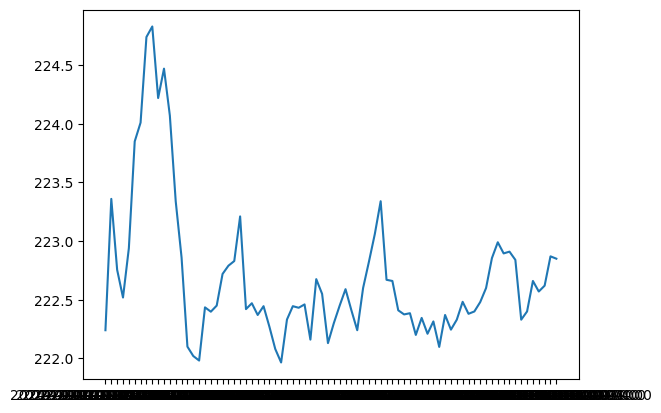

In [ ]:
plt.plot(chunks.get_date('2024-11-01')['Close'])

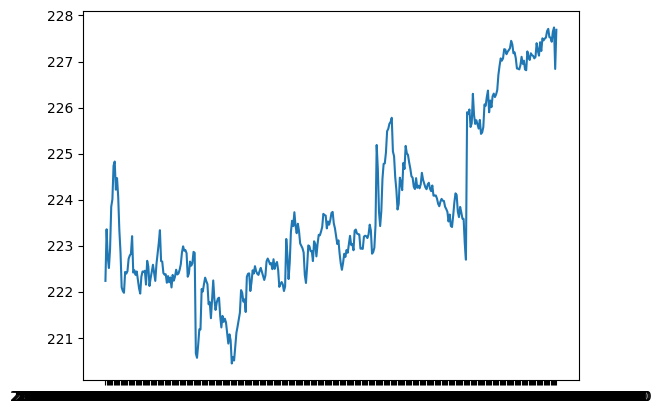

In [15]:
plt.plot(chunks.get_date_chunk('2024-11-01', '2024-11-07')['Close'])